In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Clean_Dataset.csv')

In [69]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [70]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [71]:
df.shape

(300153, 12)

In [72]:
df.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [74]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [75]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [76]:
df['flight'].unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], shape=(1561,), dtype=object)

Text(0, 0.5, 'Count')

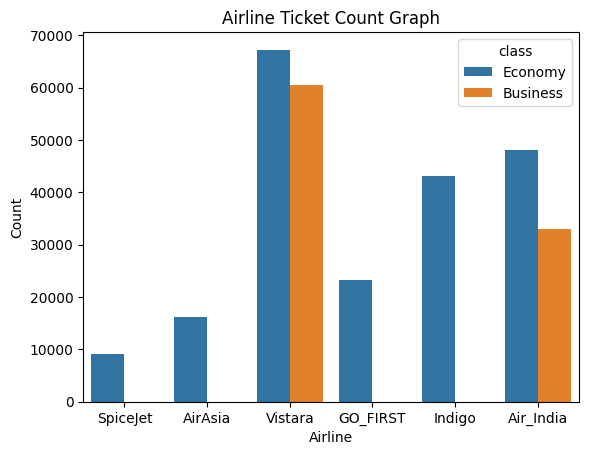

In [77]:
sns.countplot(x='airline',data=df,hue='class')
plt.title('Airline Ticket Count Graph')
plt.xlabel('Airline')
plt.ylabel('Count')

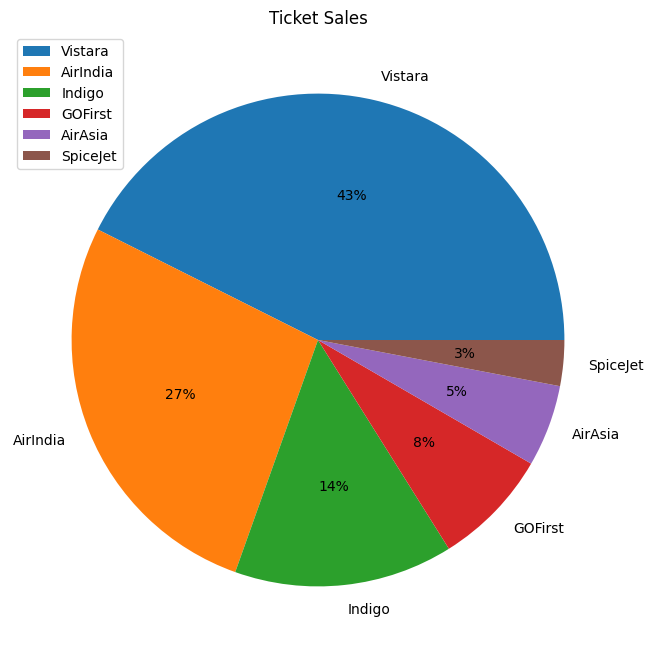

In [78]:
airlines=['Vistara','AirIndia','Indigo','GOFirst','AirAsia','SpiceJet']
plt.figure(figsize=(8,8))
plt.pie(df['airline'].value_counts(),autopct='%1.f%%',labels=airlines)
plt.title('Ticket Sales')
plt.legend(loc='upper left')
plt.show()

In [79]:
df['duration'].value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
47.08       1
41.58       1
37.17       1
44.50       1
41.50       1
Name: count, Length: 476, dtype: int64

<Figure size 1200x1200 with 0 Axes>

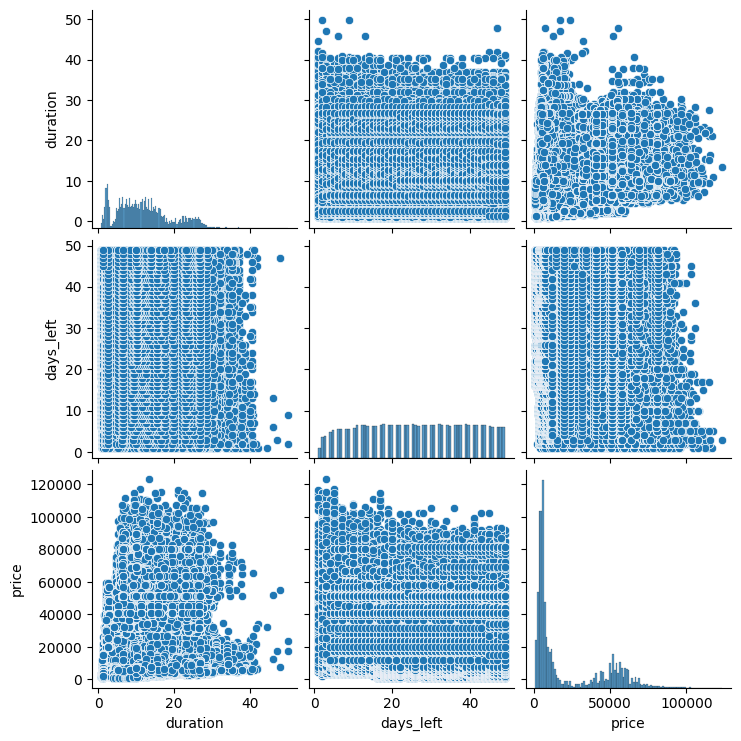

In [80]:
plt.figure(figsize=(12,12))
# sns.scatterplot(x='duration',y='price',data=df,hue='duration')
sns.pairplot(df.drop(columns=['Unnamed: 0','class'],axis=1))
# plt.bar(df['duration'],df['price'])
plt.show()

In [81]:
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [82]:
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [83]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [84]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [85]:
df['flight'].unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], shape=(1561,), dtype=object)

In [86]:
df['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [87]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

<Axes: >

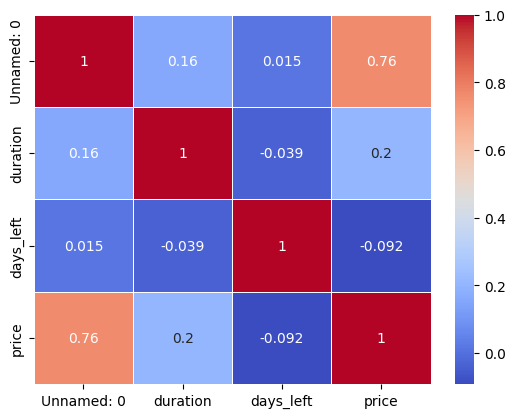

In [88]:
corrilation=df.corr(numeric_only=True)
sns.heatmap(corrilation,cmap='coolwarm',annot=True,linewidths=0.5)

In [89]:
# Label Encoding class and stop columns
Encode_df=df
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
Encode_df['class']=label.fit_transform(df['class'])
Encode_df['stops']=label.fit_transform(df['stops'])
class_label=['Business','Economy']
Encode_df

# business = 0 ,Economy = 1
#['zero' =2, 'one'=0, 'two_or_more'=1]

# sns.countplot(x='class',data=df)
# plt.xlabel('Ticket class')


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,2,Night,Mumbai,1,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,2,Morning,Mumbai,1,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,2,Early_Morning,Mumbai,1,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,2,Afternoon,Mumbai,1,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,2,Morning,Mumbai,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,0,Evening,Hyderabad,0,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,0,Night,Hyderabad,0,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,0,Night,Hyderabad,0,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,0,Evening,Hyderabad,0,10.00,49,81585


In [90]:
# get dummies encoding: source, destination,airlines,dep_time,arrival_time

Encode_df=pd.get_dummies(df,columns=['airline','source_city','destination_city','departure_time','arrival_time'],drop_first=True,dtype=int)
Encode_df


,Unnamed: 0,flight,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,SG-8709,2,1,2.17,1,5953,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,SG-8157,2,1,2.33,1,5953,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2,I5-764,2,1,2.17,1,5956,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,3,UK-995,2,1,2.25,1,5955,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,UK-963,2,1,2.33,1,5955,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,UK-822,0,0,10.08,49,69265,0,0,0,...,0,0,0,1,0,0,1,0,0,0
300149,300149,UK-826,0,0,10.42,49,77105,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300150,300150,UK-832,0,0,13.83,49,79099,0,0,0,...,1,0,0,0,0,0,0,0,0,1
300151,300151,UK-828,0,0,10.00,49,81585,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [91]:
Encode_df.dtypes

Unnamed: 0                        int64
flight                           object
stops                             int64
class                             int64
duration                        float64
days_left                         int64
price                             int64
airline_Air_India                 int64
airline_GO_FIRST                  int64
airline_Indigo                    int64
airline_SpiceJet                  int64
airline_Vistara                   int64
source_city_Chennai               int64
source_city_Delhi                 int64
source_city_Hyderabad             int64
source_city_Kolkata               int64
source_city_Mumbai                int64
destination_city_Chennai          int64
destination_city_Delhi            int64
destination_city_Hyderabad        int64
destination_city_Kolkata          int64
destination_city_Mumbai           int64
departure_time_Early_Morning      int64
departure_time_Evening            int64
departure_time_Late_Night         int64


In [92]:
Encode_df.drop(['Unnamed: 0','flight'],axis=1,inplace=True)
Encode_df

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,2,1,2.17,1,5953,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,2,1,2.33,1,5953,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,2,1,2.17,1,5956,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,2,1,2.25,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,2,1,2.33,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,0,10.08,49,69265,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
300149,0,0,10.42,49,77105,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
300150,0,0,13.83,49,79099,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
300151,0,0,10.00,49,81585,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


<Axes: >

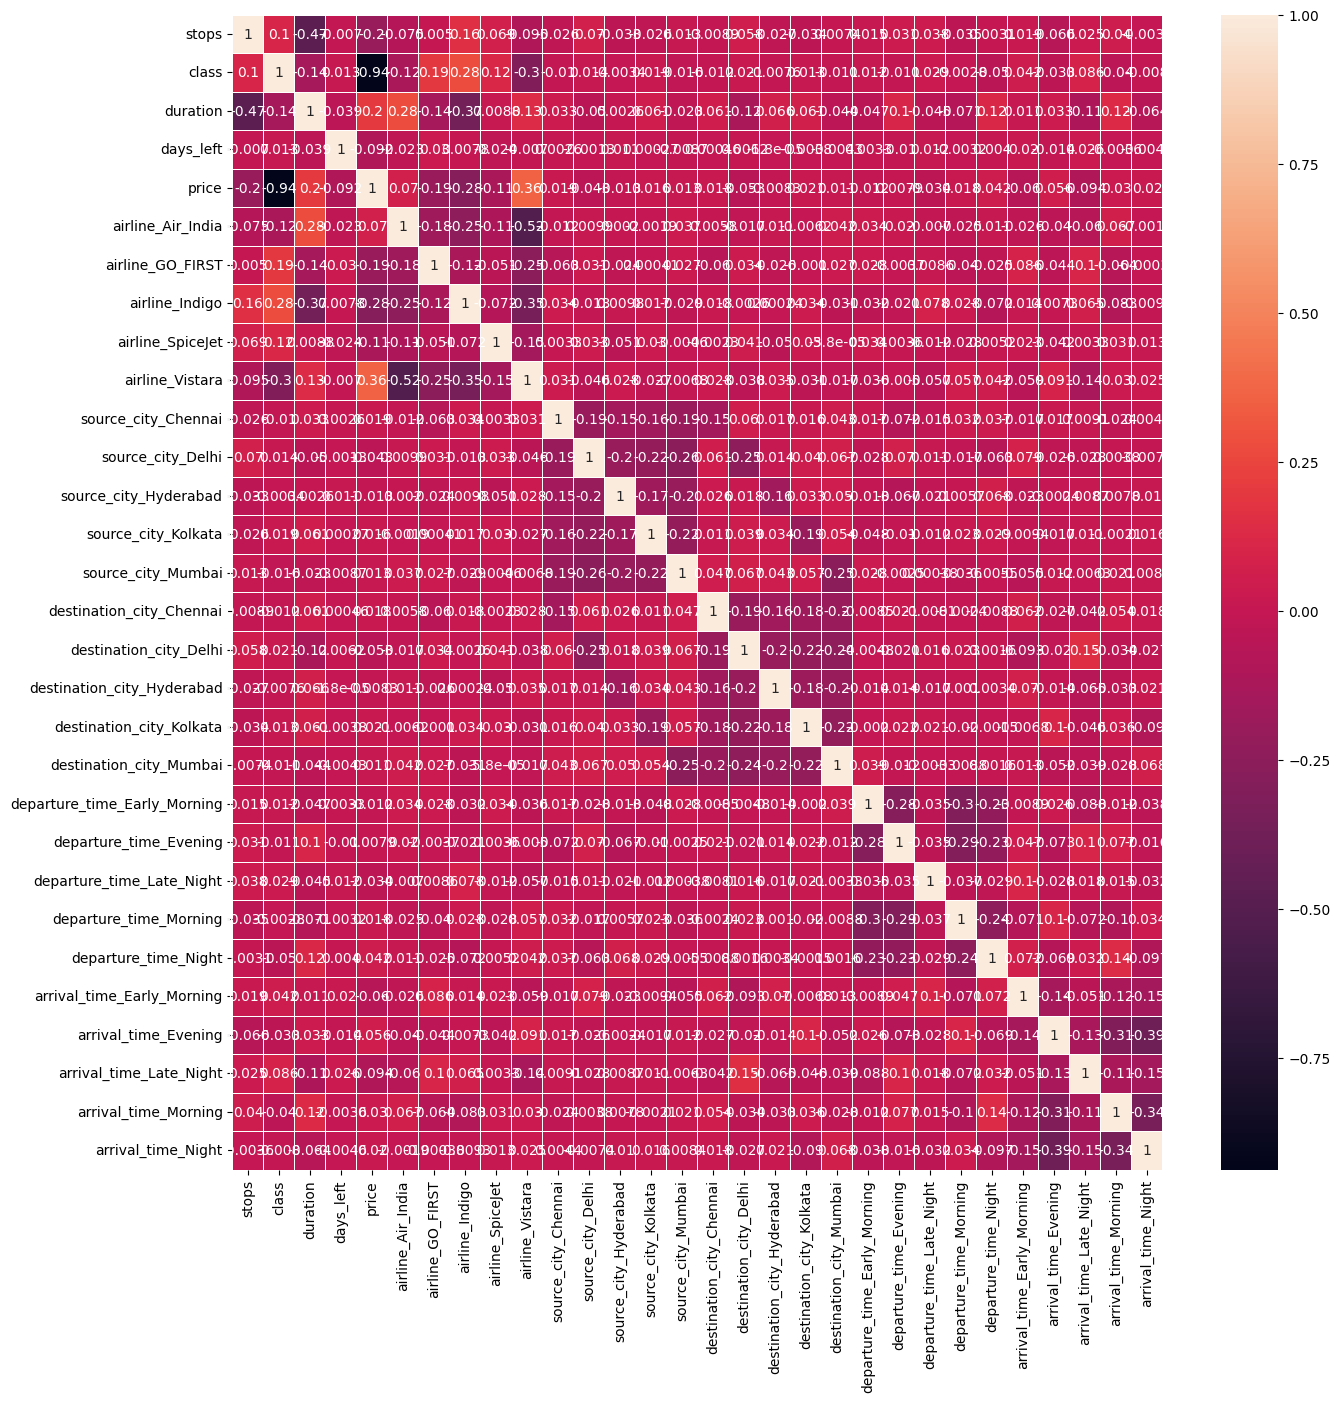

In [93]:
corrilation2=Encode_df.corr(numeric_only=True)
plt.figure(figsize=(15,15))
sns.heatmap(corrilation2,annot=True,linewidths=0.5)

<Axes: >

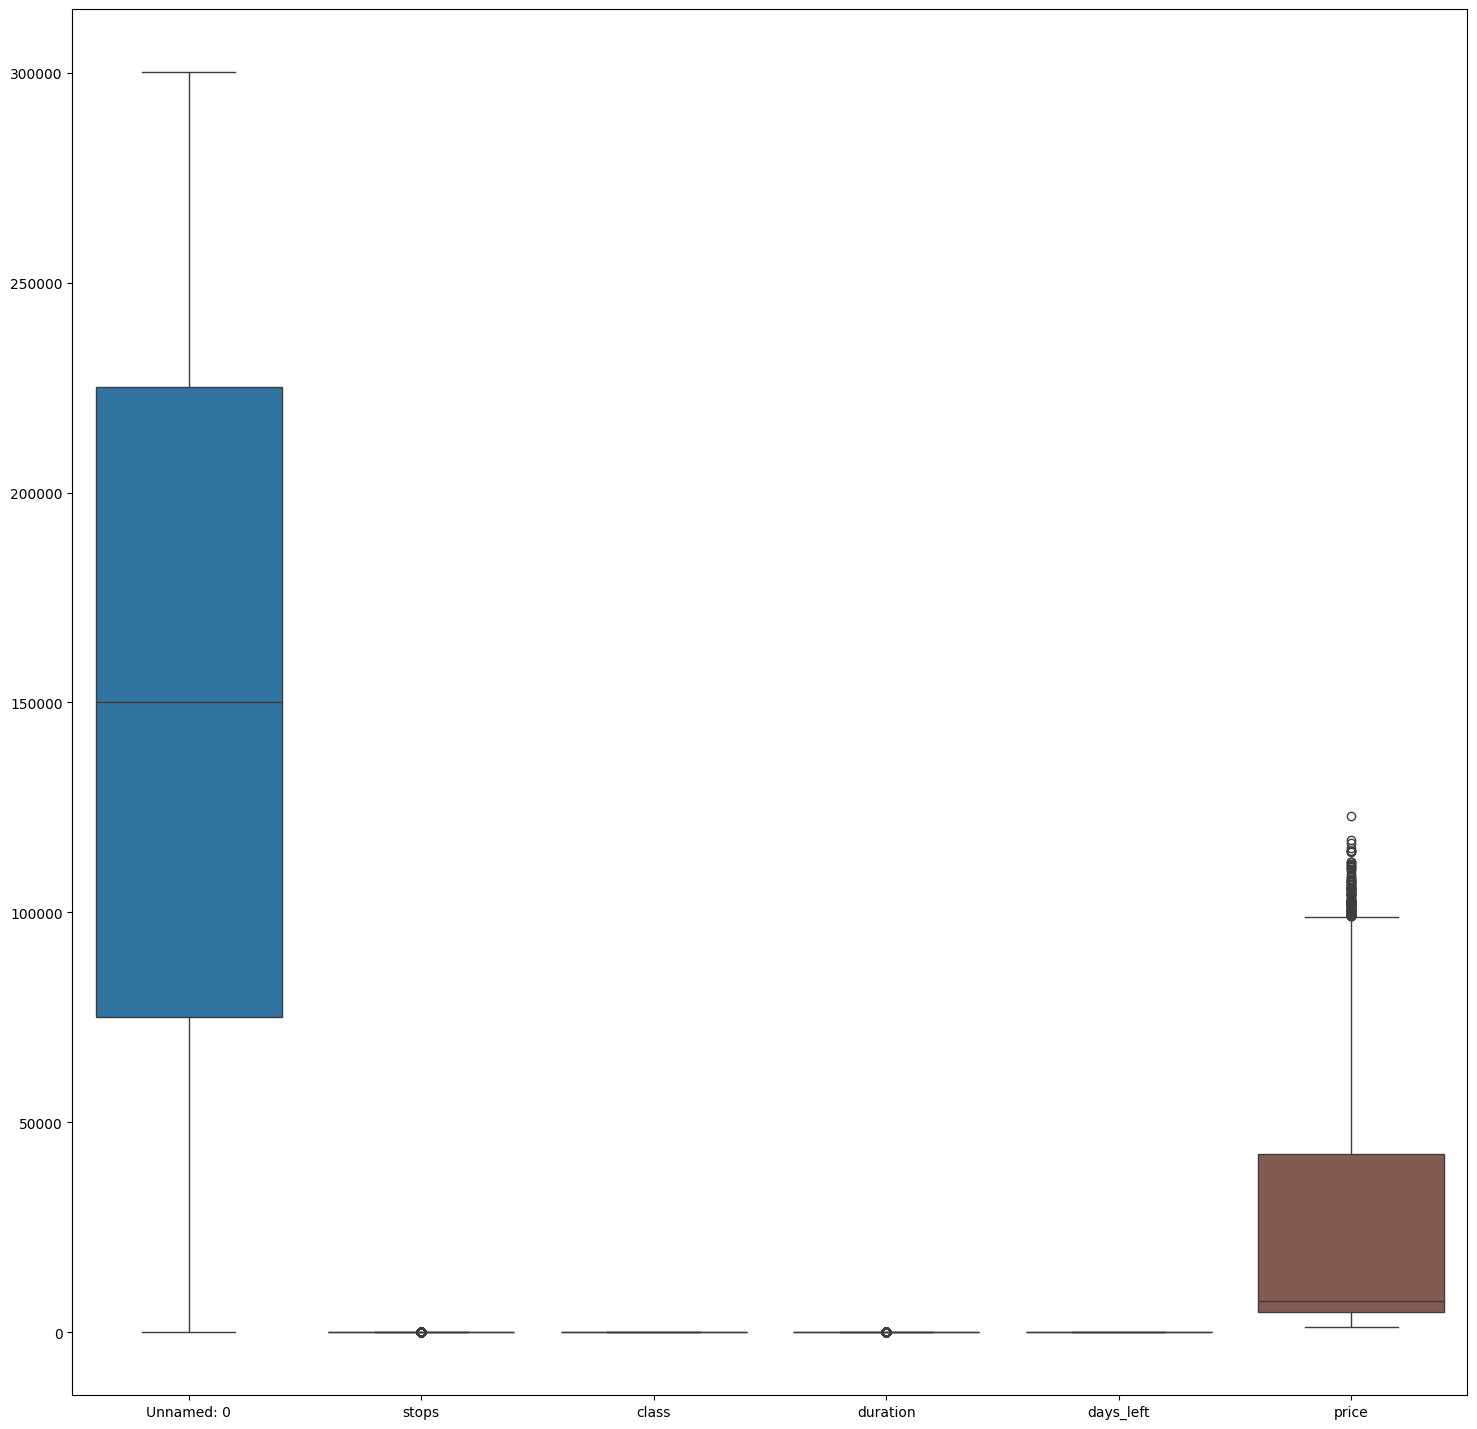

In [94]:
nummeric_columns = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(18,18))
sns.boxplot(data=df[nummeric_columns])

In [95]:
outlier_columns=['stops','duration','price']

def remove_outliers(df,columns):
    for col in columns:
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df=df[(df[col]>= lower_bound) & (df[col]<= upper_bound )]
    return df
df_cleaned= remove_outliers(df,outlier_columns)

In [96]:
x=Encode_df.iloc[:,:-1]
y=Encode_df.iloc[:,-1]

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [100]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=50,random_state=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [101]:
from sklearn.metrics import mean_absolute_percentage_error,root_mean_squared_error,r2_score
MAPE=mean_absolute_percentage_error(y_test,y_pred)
print('mean_absolute_percentage_error :',MAPE)
RMSE=root_mean_squared_error(y_test,y_pred)
print('root_mean_squared_error',RMSE)
r2=r2_score(y_test,y_pred)
print('R2_Score',r2)

mean_absolute_percentage_error : 67019340122.56474
root_mean_squared_error 0.0035198328491387355
R2_Score 0.9999412290627699
